# Predicting Worldwide Movie Revenue 

I produced this project as part of the Metis Bootcamp. I was interested in predicting movie revenue because my brother is a cinematographer, and one of my relatives was a popular cinema director back in Spain. The aim of this project is to develop a linear regression model that predicts gross-worldwide revenue, for movie producers to use when deciding between releasing their movie on theaters or on streaming services.

In [63]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

#### Load the databases.

The data that will be used in this project is spread into three databsed (.csv files). The reason is that, on the one hand, I ended up doing the web-scrapping in two phases -as you can check in web_scrapping_IMDb.ipynb-. In the first phase, I web-scrapped the titles of all the movies in English on IMDb released between 2015 and 2021 (the data is stored in **movies_database_until_movie_5719.csv**) This initial web-scrapping did not require clicking into each movie link. In addition to the movie title, other data was scrapped, which later helped filter the dataset (only movies with more than 200 votes were considered). Then, I web-scrapped more data from the IMDb web page of each movie of interest, which was stored in **movies_links_filtered.csv**. It turns out that I ended up being interested in movie data that was only stored in **movies_database_until_movie_5719.csv** and not in **movies_links_filtered.csv**. For this reason, I need to merge both datasets. In perspective, I might have used SQL instead of .csv files. 

Finally, the dataset **actors.csv** contains data from the top 1000 actors. This dataset was produced in 2014 and was updated just in a few ocasions since then. 

In [3]:
movies_database1 = pd.read_csv('movies_links_filtered.csv',index_col='Unnamed: 0')
movies_database2 = pd.read_csv('movies_database_until_movie_5719.csv',index_col='Unnamed: 0')
top_1000_actors = pd.read_csv('actors.csv', usecols = ['Names'])

In [5]:
movies_database2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    5720 non-null   object 
 1   movie_ID                 5720 non-null   object 
 2   release_date             5720 non-null   object 
 3   release_country          5720 non-null   object 
 4   num_user_reviews         5720 non-null   object 
 5   num_critic_reviews       5085 non-null   object 
 6   total_awards_wins        2314 non-null   float64
 7   total_nominations        2623 non-null   float64
 8   oscar_wins               5720 non-null   int64  
 9   oscar_nominations        5720 non-null   int64  
 10  production_companies     5720 non-null   object 
 11  budget                   1799 non-null   object 
 12  opening_weekend_usa_can  5720 non-null   object 
 13  gross_usa_can            5720 non-null   object 
 14  gross_worldwide         

In [6]:
movies_database1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5720 non-null   object 
 1   movie_ID         5720 non-null   object 
 2   link             5720 non-null   object 
 3   MPPA             5720 non-null   object 
 4   runtime          5720 non-null   object 
 5   genre            5720 non-null   object 
 6   IMDB_rating      5720 non-null   float64
 7   number_of_votes  5720 non-null   int64  
 8   metacritic       5720 non-null   object 
 9   year_release     5720 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 491.6+ KB


# Preprocessing

The two movie .csv files have the same number of rows, 5270.

In [7]:
movies_list =  pd.merge(movies_database2, movies_database1,how='inner', on='movie_ID')

In [8]:
movies_list.tail()

,title_x,movie_ID,release_date,release_country,num_user_reviews,num_critic_reviews,total_awards_wins,total_nominations,oscar_wins,oscar_nominations,...,top_writer,title_y,link,MPPA,runtime,genre,IMDB_rating,number_of_votes,metacritic,year_release
5715,Keep in Touch,tt3344998,"November 4, 2016",United States,0,6,9.0,1.0,0,0,...,Michael Angelo Covino,Keep in Touch,https://www.imdb.com/title/tt3344998?ref_=fn_a...,Not Rated,105,"['Comedy', ' Drama', ' Music']",6.7,204,[],2015
5716,Eyes of the Dead,tt4685626,"August 24, 2018",United States,6,4,NaN,NaN,0,0,...,Ben Samuels,Eyes of the Dead,https://www.imdb.com/title/tt4685626?ref_=fn_a...,TV-14,83,"['Action', ' Horror', ' Thriller']",3.9,203,[],2015
5717,Bigfoot the Movie,tt4637832,"May 29, 2015",United States,14,2,NaN,NaN,0,0,...,Jared Show,Bigfoot the Movie,https://www.imdb.com/title/tt4637832?ref_=fn_a...,Not Rated,96,['Comedy'],5.6,203,[],2015
5718,Alcatraz Prison Escape: Deathbed Confession,tt1379712,"March 15, 2015",United States,9,NaN,NaN,NaN,0,0,...,John Edward Lee,Alcatraz Prison Escape: Deathbed Confession,https://www.imdb.com/title/tt1379712?ref_=fn_a...,[],93,"['Action', ' Crime']",5.2,201,[],2015
5719,Richard Peter Johnson,tt2847520,December 2015,United States,2,NaN,NaN,NaN,0,0,...,Rik Baron,Richard Peter Johnson,https://www.imdb.com/title/tt2847520?ref_=fn_a...,TV-MA,88,['Comedy'],5.1,200,[],2015


In [ ]:
# This removes the duplicated title, and the link column that won't be used anymore in any part of this project.
del movies_list['title_y']
del movies_list['link']
movies_list = movies_list.rename(columns = {'title_x':'title'})


In [ ]:
# This is the resulting pandas DataFrame:
movies_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    5720 non-null   object 
 1   movie_ID                 5720 non-null   object 
 2   release_date             5720 non-null   object 
 3   release_country          5720 non-null   object 
 4   num_user_reviews         5720 non-null   object 
 5   num_critic_reviews       5085 non-null   object 
 6   total_awards_wins        2314 non-null   float64
 7   total_nominations        2623 non-null   float64
 8   oscar_wins               5720 non-null   int64  
 9   oscar_nominations        5720 non-null   int64  
 10  production_companies     5720 non-null   object 
 11  budget                   1799 non-null   object 
 12  opening_weekend_usa_can  5720 non-null   object 
 13  gross_usa_can            5720 non-null   object 
 14  gross_worldwide         

Missing values (in the form of '' of [], are converted into NaN):

In [ ]:
movies_list = movies_list.replace('',np.NaN)
movies_list = movies_list.replace('[]',np.NaN)

In [ ]:
movies_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5719
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    5720 non-null   object 
 1   movie_ID                 5720 non-null   object 
 2   release_date             5708 non-null   object 
 3   release_country          5708 non-null   object 
 4   num_user_reviews         5720 non-null   object 
 5   num_critic_reviews       5085 non-null   object 
 6   total_awards_wins        2314 non-null   float64
 7   total_nominations        2623 non-null   float64
 8   oscar_wins               5720 non-null   int64  
 9   oscar_nominations        5720 non-null   int64  
 10  production_companies     5385 non-null   object 
 11  budget                   1798 non-null   object 
 12  opening_weekend_usa_can  1589 non-null   object 
 13  gross_usa_can            1672 non-null   object 
 14  gross_worldwide         

In [ ]:
# Looks to me that this step is redundant:
movies_list['opening_weekend_usa_can'].replace('[]',np.NaN)
movies_list['budget'].replace('[]',np.NaN)
movies_list['gross_worldwide'].replace('[]',np.NaN)


0       $1074419384
1       $2797501328
2        $374565754
3        $311605581
4       $1128462972
           ...     
5715            NaN
5716            NaN
5717            NaN
5718            NaN
5719            NaN
Name: gross_worldwide, Length: 5720, dtype: object

Budget,opening_weekend_usa_can, gross_usa_can, gross_worldwide

Next, I remove the currency symbols and in the case of currencies other than the dollar, I convert the amount into dollars:

In [ ]:
def removeDolarSign(row): 

    if type(row) == str:
        replaced = re.sub('[$,€,CA,₹,created,May,£]', '', row)        
        if '€' in row:
            replaced = str(int(replaced)*1.17)
        if 'CA' in row:
            replaced = str(int(replaced)*0.79) 
        if '₹' in row:
            replaced = str(int(replaced)*0.01) 
        if 'created' in row or 'May' in row:
            replaced = np.NaN
        if '£' in row:
            replaced = str(int(replaced)*1.3462)
                
        row = replaced    
            
    return row


movies_list['budget'] = movies_list['budget'].apply(removeDolarSign)
movies_list['opening_weekend_usa_can'] = movies_list['opening_weekend_usa_can'].apply(removeDolarSign)
movies_list['gross_usa_can'] = movies_list['gross_usa_can'].apply(removeDolarSign)
movies_list['gross_worldwide'] = movies_list['gross_worldwide'].apply(removeDolarSign)


There are null values in some columns key columns like the target, 'gross_worldwide', and one relevant predictor,'budget'. Below I remove all movies (rows) with null values in these columns:


In [ ]:
mask1 = movies_list['gross_worldwide'].notnull()
mask2 = movies_list['opening_weekend_usa_can'].notnull()
mask3 = movies_list['budget'].notnull()

movies_list_filtered = movies_list[mask1 & mask2 & mask3].copy()

This function transforms several columns to a numeric format:

In [ ]:
def converts_to_numeric(df,list_of_features):
    for feature in list_of_features:
        df[feature] = pd.to_numeric(df[feature])
        
    return df
    
list_of_features = ['budget','opening_weekend_usa_can','gross_usa_can','gross_worldwide' ,
                    'metacritic','IMDB_rating','runtime','oscar_nominations','oscar_wins','oscar_nominations','total_awards_wins']

movies_list_filtered = converts_to_numeric(movies_list_filtered,list_of_features)

Let's check now that we have unique movie_id. It will output 'True' if there are no duplicates.

In [ ]:
movies_list_filtered['movie_ID'].nunique() == len(movies_list_filtered)

True

Good. There are no duplicates.

#### Preprocessing of the top_1000_actors dataFrame

In [ ]:
top_1000_actors = top_1000_actors.rename(columns = {'Names':'top_star'}) # convenient column renaming
top_1000_actors['is_top_actor'] = 1 # Creates a new column that will be relevant when merging with movies_list_filtered
top_1000_actors.head()

,top_star,is_top_actor
0,Robert De Niro,1
1,Jack Nicholson,1
2,Marlon Brando,1
3,Denzel Washington,1
4,Katharine Hepburn,1


In [ ]:
movies_list_filtered = pd.merge(movies_list_filtered, top_1000_actors,how='left', on='top_star')
movies_list_filtered['is_top_actor'] = movies_list_filtered['is_top_actor'].replace(np.NaN,0)

# Adding dummmy variables

#### Genre

In [ ]:
movies_list_filtered['genre']

0         ['Crime', ' Drama', ' Thriller']
1       ['Action', ' Adventure', ' Drama']
2                     ['Comedy', ' Drama']
3           ['Comedy', ' Crime', ' Drama']
4      ['Action', ' Adventure', ' Sci-Fi']
                      ...                 
909         ['Comedy', ' Crime', ' Drama']
910                ['Horror', ' Thriller']
911                             ['Comedy']
912                 ['Drama', ' Thriller']
913               ['Mystery', ' Thriller']
Name: genre, Length: 914, dtype: object

In [ ]:
def str_to_lists(row):
    row = re.sub("[^\w]", " ",  row).split()
    return row 
            
movies_list_filtered['genre'] = movies_list_filtered['genre'].apply(str_to_lists)

In [ ]:
movies_list_filtered['genre']

0          [Crime, Drama, Thriller]
1        [Action, Adventure, Drama]
2                   [Comedy, Drama]
3            [Comedy, Crime, Drama]
4      [Action, Adventure, Sci, Fi]
                   ...             
909          [Comedy, Crime, Drama]
910              [Horror, Thriller]
911                        [Comedy]
912               [Drama, Thriller]
913             [Mystery, Thriller]
Name: genre, Length: 914, dtype: object

In [ ]:
df_dummy_genre = movies_list_filtered['genre'].str.join('|').str.get_dummies()

In [ ]:
df_dummy_genre.sum().sort_values(ascending = False)

Drama        457
Comedy       319
Action       302
Adventure    252
Crime        148
Thriller     136
Biography    119
Horror       119
Romance       93
Mystery       91
Fi            88
Sci           88
Animation     82
Fantasy       75
Family        42
History       40
Music         23
Sport         21
War           12
Western       10
Musical        7
dtype: int64

In [ ]:
def assign_other_genre(row):
    top_genre = ['Drama', 'Comedy', 'Action', 'Adventure','Crime','Thriller']
    updated_row = []
    for i in range(len(row)):
        if row[i] not in top_genre:
            updated_row.append('Other')
        else:
            updated_row.append(row[i])
            
    return updated_row
            
movies_list_filtered['genre_updated'] = movies_list_filtered['genre'].apply(assign_other_genre)

In [ ]:
# Dummy genre_updated:
df_dummy_genre_updated = movies_list_filtered['genre_updated'].str.join('|').str.get_dummies()
df_dummy_genre_updated.sum().sort_values(ascending = False)

Other        631
Drama        457
Comedy       319
Action       302
Adventure    252
Crime        148
Thriller     136
dtype: int64

In [ ]:
# merge dummy_df with original df
movies_list_filtered = movies_list_filtered.merge(df_dummy_genre_updated, left_index=True, right_index=True).reset_index(drop=True)

In [ ]:
movies_list_filtered = movies_list_filtered.rename(columns = {'Other':'Genre_Other'})

Note that in this case, there is no risk of perfect multicollinearity because each movie can have more than one genre! For this reason, I decided not to drop one of the dummy variables

#### MPPA:

In [ ]:
# Count MPPA
df_MPPA_num = movies_list_filtered['MPPA'].str.get_dummies()
df_MPPA_num.sum().sort_values(ascending = False)

R            378
PG-13        349
PG           142
Not Rated     21
TV-MA          7
G              3
Unrated        3
TV-14          2
dtype: int64

In [ ]:
# I am going to group TV-MA, G, Unrated and TV-14 as belonging to the same 'other' category. 

def assign_other_MBPA(row):
    top_genre = ['R', 'PG-13', 'PG']
    if row not in top_genre:
        return 'Other'
    else:
        return row
                        
movies_list_filtered['MPPA_updated'] = movies_list_filtered['MPPA'].apply(assign_other_MBPA)

In [ ]:
movies_list_filtered = pd.get_dummies(movies_list_filtered, columns=['MPPA_updated'], drop_first=True) # can just apply it to the whole df
movies_list_filtered.head(3)

,title,movie_ID,release_date,release_country,num_user_reviews,num_critic_reviews,total_awards_wins,total_nominations,oscar_wins,oscar_nominations,...,Action,Adventure,Comedy,Crime,Drama,Genre_Other,Thriller,MPPA_updated_PG,MPPA_updated_PG-13,MPPA_updated_R
0,Joker,tt7286456,"October 4, 2019",United States,11K,743.0,118.0,239.0,2,0,...,0,0,0,1,1,0,1,0,0,1
1,Avengers: Endgame,tt4154796,"April 26, 2019",United States,9.3K,583.0,70.0,122.0,0,1,...,1,1,0,0,1,0,0,0,1,0
2,Once Upon a Time... In Hollywood,tt7131622,"July 26, 2019",United States,5.5K,645.0,138.0,379.0,2,0,...,0,0,1,0,1,0,0,0,0,1


#### Release Month:

In [ ]:
def str_to_month_name(row):
    return pd.to_datetime(row).month_name()

movies_list_filtered['month'] = movies_list_filtered['release_date'].apply(str_to_month_name)

movies_list_filtered = pd.get_dummies(movies_list_filtered, columns=['month'], drop_first=True) # can just apply it to the whole df
movies_list_filtered.head(3)

,title,movie_ID,release_date,release_country,num_user_reviews,num_critic_reviews,total_awards_wins,total_nominations,oscar_wins,oscar_nominations,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Joker,tt7286456,"October 4, 2019",United States,11K,743.0,118.0,239.0,2,0,...,0,0,0,0,0,0,0,0,1,0
1,Avengers: Endgame,tt4154796,"April 26, 2019",United States,9.3K,583.0,70.0,122.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Once Upon a Time... In Hollywood,tt7131622,"July 26, 2019",United States,5.5K,645.0,138.0,379.0,2,0,...,0,0,0,1,0,0,0,0,0,0


#### Convert release Date into 'Date Time'

In [50]:
movies_list_filtered['DATE_TIME'] = pd.to_datetime(movies_list_filtered['release_date'])

#### Production Companies 

In [ ]:
movies_list_filtered['production_companies']

0          ['Warner Bros.', 'Village Roadshow Pictures']
1             ['Marvel Studios', 'Walt Disney Pictures']
2      ['Columbia Pictures', 'Bona Film Group', 'Heyd...
3      ['Lionsgate', 'Media Rights Capital (MRC)', 'T...
4      ['Walt Disney Pictures', 'Marvel Studios', 'An...
                             ...                        
909                 ['JWright Productions', 'JJS Films']
910                             ['Dead Wait Productons']
911    ['Lantica Media', 'Pinewood Dominican Republic...
912                              ['American Hero Films']
913                             ['Absinthe Productions']
Name: production_companies, Length: 914, dtype: object

In [ ]:
def remove_apostrophe_spaces(row):
    row = str(row).split(',') # movies_list_filtered['production_companies'].iloc[0]
    updated_companies = []
    for company in row:
        company = re.sub("[^\w]", "", company)
        updated_companies.append(company)
        
    return updated_companies 
            
movies_list_filtered['production_companies_updated'] = movies_list_filtered['production_companies'].apply(remove_apostrophe_spaces)
movies_list_filtered['production_companies_updated']

0                 [WarnerBros, VillageRoadshowPictures]
1                   [MarvelStudios, WaltDisneyPictures]
2        [ColumbiaPictures, BonaFilmGroup, HeydayFilms]
3           [Lionsgate, MediaRightsCapitalMRC, TStreet]
4      [WaltDisneyPictures, MarvelStudios, AnimalLogic]
                             ...                       
909                      [JWrightProductions, JJSFilms]
910                                [DeadWaitProductons]
911    [LanticaMedia, PinewoodDominicanRepublicStudios]
912                                 [AmericanHeroFilms]
913                               [AbsintheProductions]
Name: production_companies_updated, Length: 914, dtype: object

In [ ]:
def assign_other_company(row):
    top_genre = ['UniversalPictures', 'ColumbiaPictures', 'WarnerBros', 'WaltDisneyPictures','ParamountPictures']
    updated_row = []
    for i in range(len(row)):
        if row[i] not in top_genre:
            updated_row.append('Other')
        else:
            updated_row.append(row[i])
            
    return updated_row
            
movies_list_filtered['production_companies_grouped'] = movies_list_filtered['production_companies_updated'].apply(assign_other_company)
movies_list_filtered['production_companies_grouped']

0                     [WarnerBros, Other]
1             [Other, WaltDisneyPictures]
2        [ColumbiaPictures, Other, Other]
3                   [Other, Other, Other]
4      [WaltDisneyPictures, Other, Other]
                      ...                
909                        [Other, Other]
910                               [Other]
911                        [Other, Other]
912                               [Other]
913                               [Other]
Name: production_companies_grouped, Length: 914, dtype: object

In [ ]:
# Generate dummy variables:
df_dummy_companies = movies_list_filtered['production_companies_grouped'].str.join('|').str.get_dummies()
df_dummy_companies = df_dummy_companies.rename(columns = {'Other':'Companies_Other'})


In [ ]:
# merge dummy_df with original df
movies_list_filtered = movies_list_filtered.merge(df_dummy_companies, left_index=True, right_index=True).reset_index(drop=True)

## Exploratory Data Analysis

In [ ]:
movies_list_filtered.year_release.unique()

array([2019, 2020, 2021, 2018, 2017, 2016, 2015])

There are a *lot* of variables, many of which have a lot of missing values.  Let's pick out just a few numerical columns for the baseline model 'budget','runtime', and 'gross_worldwide' because it is the target. There are just few available numerical features. 

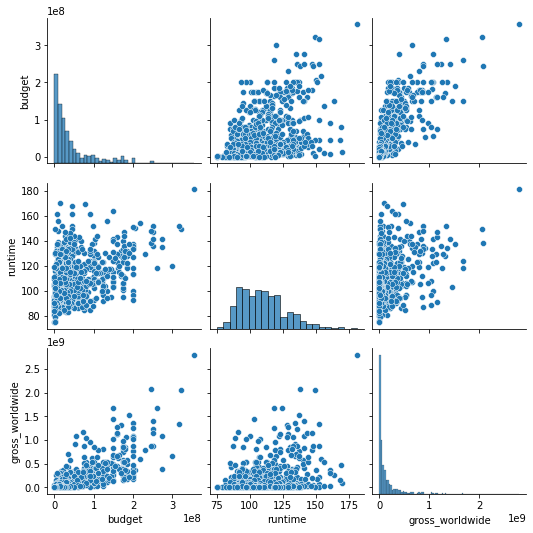

In [39]:
sns.pairplot(movies_list_filtered[['budget','runtime','gross_worldwide']])

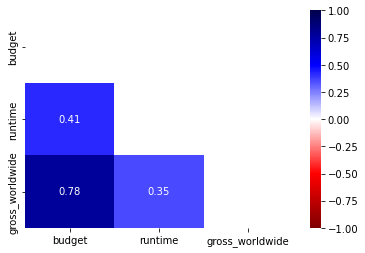

In [40]:
upper = np.triu(movies_list_filtered[['budget','runtime','gross_worldwide']].corr())  # optionally, you can just look at the lower triangle
sns.heatmap(movies_list_filtered[['budget','runtime','gross_worldwide']].corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

<AxesSubplot:>

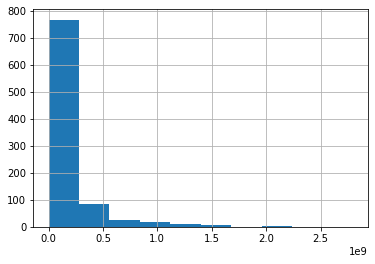

In [69]:
# Histogram of all gross_worldwide
movies_list_filtered['gross_worldwide'].hist(bins = 10)

Most gross_worldwide revenues are below 250M dollars. In the final evaluation of the models, I will include a MAE for three movie segments:
- Movies predicted to have a revenue smaller than 250M dollars
- Movies predicted to have a revenue between 250M and 1B dollars
- Movies predicted to have a revenue larger than 1B dollars

# Establish a training / validation / test scheme

In [53]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, log_loss



In the next steps, I perform an initial training - validation / test split. 

First, this splits the data into X and y (y: the target feature, X: all the other features):

In [54]:
X, y = movies_list_filtered.drop('gross_worldwide',axis=1), movies_list_filtered['gross_worldwide']

This performs the split. It holds out 20% of the data for final testing. Not that I introduce a seed for the random_state parameter.
This means that the split will be reproducible. Note that in further steps using lassoCV and ridgeCV I won't provide any random state in the split. 
lassoCV and ridgeCV do not shuffle the observations before assigning them to each split. But we have already performed the shuffle (in a reproducible way)
in the following step, so there is no need to shuffle again when cross-validating:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

Functions for computing the adjusted R^2, MAE and RMSE:

# Define functions for some evaluation metrics:

In [ ]:
def adj_r2(r2_score,X_tr):
    n = len(X_tr)
    p = X_tr.shape[1]
    return 1-(1-r2_score)*(n-1)/(n-p-1)


In [ ]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))


In [ ]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))


In [ ]:
def MAE_by_intervals(preds,actuals):

    mae = MAE(actuals,preds)/1000000
    rmse = RMSE(actuals,preds)/1000000
    
    mask_smaller_than_250M = (actuals < 250000000)
    mask_smaller_than_1000M = (actuals < 1000000000)
    
    mae_smaller_250M = MAE(actuals[actuals < 250000000],preds[actuals < 250000000])/1000000
    mae_250M_to_1B = MAE(actuals[mask_smaller_than_1000M & ~mask_smaller_than_250M],preds[mask_smaller_than_1000M & ~mask_smaller_than_250M])/1000000
    mae_more_than_1B = MAE(actuals[~mask_smaller_than_1000M],preds[~mask_smaller_than_1000M])/1000000
    
    return mae_smaller_250M, mae_250M_to_1B, mae_more_than_1B
        
        

# Baseline model:

For the baseline model, I will use the two numerical features available: budget and runtime. I will train a simple OLS (Ordinary Least Squares) linear regression model, with sklearn: 

In [60]:
def plots_diagnoses(type_regularization,model,actuals,preds,logs,target_transformation,X_test_DATE_TIME):
        
    #set seaborn plotting aesthetics as default
    sns.set()
   
    
    # PLOT 1
    
    #define plotting regions (1 row, 4 columns)
    fig, axes = plt.subplots(1,4,figsize=(20,5)) # constrained_layout = True
    #fig.figure(figsize=(30,5)) # plt.figure(figsize=(20,5))
    fig.tight_layout()
    #plt.subplots_adjust(hspace = .001)
    

    
    if logs == 1:
        sns.regplot(x=np.log(preds), y=np.log(actuals),color="g",scatter_kws={'alpha':0.3},ax=axes[0])
        #plt.tight_layout()
        axes[0].set_title(f'{type_regularization} - log Predicted vs log Actual worldwide revenue') # ,fontsize=18,pad=20
        axes[0].set(xlabel='log Predicted Gross worldwide revenue ($ billions)', ylabel='log Actual Gross worldwide revenue ($ billions)')
        
        
        # ax[0].xlabel('log Predicted Gross worldwide revenue ($ billions)',fontsize=16)
        # ax[0].ylabel('log Actual Gross worldwide revenue ($ billions)',fontsize=18);
    
    else:
        sns.regplot(x=preds, y=actuals,color="g",scatter_kws={'alpha':0.3},ax=axes[0])
        #plt.tight_layout()
        if target_transformation == 'None':
            axes[0].set_title(f'{type_regularization} - Predicted  vs Actual worldwide revenue') # ,fontsize=18,pad=20
            axes[0].set(xlabel='Predicted Gross worldwide revenue ($ millions)', ylabel='Actual Gross worldwide revenue ($ millions)')
           
            
            #ax[0].xlabel('Predicted Gross worldwide revenue ($ millions)',fontsize=16)
            #ax[0].ylabel('Actual Gross worldwide revenue ($ millions)',fontsize=18);
        elif target_transformation == 'log':
            axes[0].set_title(f'{type_regularization} - Predicted vs log Actual worldwide revenue') # ,fontsize=18,pad=20
            axes[0].set(xlabel='Predicted Gross worldwide revenue (log $ millions)', ylabel='Actual Gross worldwide revenue (log $ millions)')
            
            #ax[0].xlabel('Predicted Gross worldwide revenue (log $ millions)',fontsize=16)
            #ax[0].ylabel('Actual Gross worldwide revenue (log $ millions)',fontsize=18);            
        elif target_transformation == 'boxcox':
            axes[0].set_title(f'{type_regularization} - Predicted vs Actual:  box-cox transformed') #,fontsize=18,pad=20
            axes[0].set(xlabel='Predicted', ylabel='Actual')
        
            
            #ax[0].xlabel('Predicted',fontsize=16)
            #ax[0].ylabel('Actual',fontsize=18);   
            
    # plt.savefig('PredictedVsActualWorldwideRevenue_1.png', dpi=100,bbox_inches = 'tight')

    
    # create residual plot
    res = actuals-preds
    
    
    # PLOT 2
    
    #plt.subplot(1, 4, 2)
    sns.scatterplot(x=preds, y=res,ax=axes[1])
    
    
    if target_transformation == 'None':
        axes[1].set_title(f'{type_regularization} - Residuals vs predicted') # ,fontsize=18,pad=20
        axes[1].set(xlabel='Predicted Gross worldwide revenue ($ millions)', ylabel='Residuals ($ millions)')
      
       # ax[1].xlabel('Predicted Gross worldwide revenue ($ millions)',fontsize=16)
       # ax[1].ylabel('Residuals ($ millions)',fontsize=18);

    elif target_transformation == 'log':
        axes[1].set_title(f'{type_regularization} - Residuals vs predicted') # ,fontsize=18,pad=20
        axes[1].set(xlabel='Predicted (log-transformed)', ylabel='Residuals (log-transformed)')
        
        
        #ax[1].xlabel('Predicted Gross worldwide revenue (log $ millions)',fontsize=16)
        #ax[1].ylabel('Residuals ($ millions)',fontsize=18);
           
    elif target_transformation == 'boxcox':
        axes[1].set_title(f'{type_regularization} - Residuals vs predicted: box-cox') # ,fontsize=18,pad=20
        axes[1].set(xlabel='Predicted (boxcox-transformed)', ylabel='Residuals (boxcox-transformed)')
        
        
        #ax[1].xlabel('Predicted',fontsize=16)
        #ax[1].ylabel('Residuals',fontsize=18);

    # plt.savefig('residuals_chosen_model.png', dpi=500,bbox_inches = 'tight')

    
    # PLOT 3
    
    # plt.subplot(1, 4, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    
    stats.probplot(res, dist="norm",plot=axes[2])
    axes[2].set_title(f"{type_regularization} - Normal Q-Q plot")
    
    
    # PLOT 4:
    # plt.subplot(1, 4, 4)
    sns.scatterplot(x = X_test_DATE_TIME, y  = res,ax=axes[3])
    axes[3].set_title(f'{type_regularization} - Residuals vs Time') # ,fontsize=18,pad=20
    axes[3].set(xlabel='Date-Time', ylabel=f'Residuals ({type_regularization})')
    
    fig.tight_layout()
    
    
    
    


In [59]:

# Linear regression (OLS):

def ols_cv(X_features,X_train,y_train,X_test,y_test,X_test_DATE_TIME):
    
    
    #this helps with the way kf will generate indices below
    X_train_array, y_train_array = np.array(X_train[X_features]), np.array(y_train)
    X_test_array, y_test_array = np.array(X_test[X_features]), np.array(y_test)

    
    kf = KFold(n_splits=10, shuffle=False)  
    cv_lm_r2s = [] #collect the validation results for the OLS model:

    for train_ind, val_ind in kf.split(X_train_array,y_train_array):

        X_train_fold, y_train_fold = X_train_array[train_ind], y_train_array[train_ind]
        X_val_fold, y_val_fold = X_train_array[val_ind], y_train_array[val_ind] 

        #simple linear regression
        std = StandardScaler()
        std.fit(X_train_fold)
        
        ## Scale the Predictors on both the train and test set
        X_train_scaled_fold = std.fit_transform(X_train_fold)
        X_val_scaled_fold = std.transform(X_val_fold)        

        lm = LinearRegression()
        lm.fit(X_train_fold, y_train_fold)
        cv_lm_r2s.append(lm.score(X_val_fold, y_val_fold).round(3))
      

    std = StandardScaler()
    X_train_scaled = std.fit_transform(X_train_array)
    X_test_scaled = std.transform(X_test_array)
    
    
    lm = LinearRegression()
    lm.fit(X_train_scaled, y_train_array)
    
    r_squared_test = lm.score(X_test_scaled, y_test)
    adjusted_r_squared = adj_r2(r_squared_test,X_test_scaled)
    
    # MAE
    test_set_preds = lm.predict(X_test_scaled)
    
    plots_diagnoses('OLS',lm,y_test,test_set_preds,0,'None',X_test['DATE_TIME'])
    
    mae_all = MAE(y_test,test_set_preds)/1000000
    mae_smaller_250M, mae_250M_to_1B, mae_more_than_1B =  MAE_by_intervals(test_set_preds,y_test)
       
    rmse = RMSE(y_test,test_set_preds)/1000000
    
   
    print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
    print(f'test R^2: {r_squared_test:.3f}')
    print(f'test adjusted R^2: {adjusted_r_squared:.3f}')
    print(f'test MAE all: {mae_all:.1f}')
    #print(f'test MAE < $250M: {mae_smaller_250M:.1f}')
    #print(f'test MAE $250M - $1B: {mae_250M_to_1B:.1f}')
    #print(f'test MAE > $1B : {mae_more_than_1B:.1f}')
    print(f'test RSME: {rmse:.1f}')
    


I will mostly use the adjusted R^2 to compare this baseline model with the next models. The adjusted R^2 is a better choice when comparing models that have different numbers of features. Therefore, we need to find models that have an adjusted R^2 > 0.675

Simple mean cv r^2: 0.539 +- 0.137
test R^2: 0.678
test adjusted R^2: 0.675
test MAE all: 95.0
test RSME: 193.1


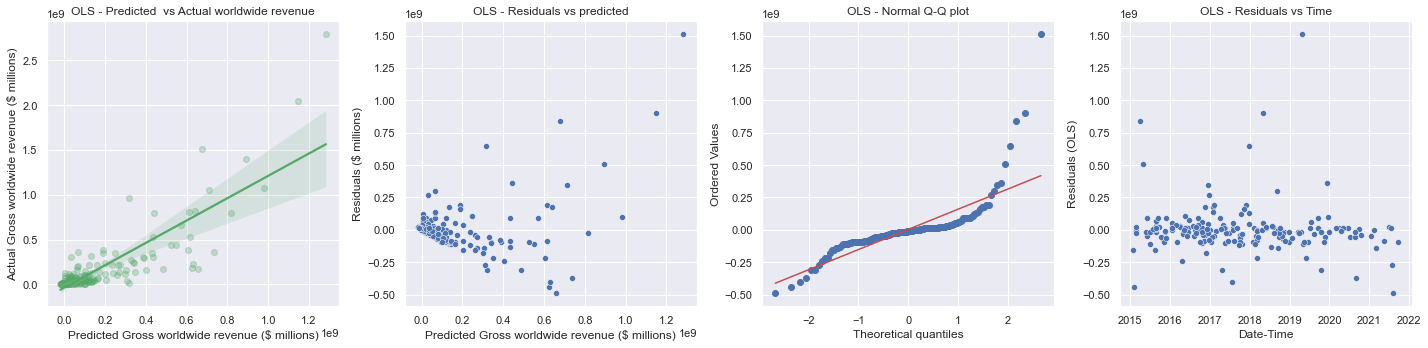

In [64]:
X_features = ['budget','runtime']  
ols_cv(X_features,X_train,y_train,X_test,y_test,X_test['DATE_TIME'])   

In [63]:
(movies_list_filtered['gross_worldwide']/1000000).sort_values(ascending=False).head(20)

1      2797.501328
724    2069.521700
197    2048.359754
730    1670.516444
19     1667.635327
737    1515.341399
33     1450.026933
726    1402.809540
198    1347.597973
368    1332.698830
212    1310.466296
382    1264.434525
213    1244.639527
391    1236.005118
755    1159.444662
526    1153.337496
204    1148.485886
7      1131.927996
4      1128.462972
6      1078.232589
Name: gross_worldwide, dtype: float64

## Improving the baseline model

Now that we have a simple OLS baseline model, it is time to improve it! I will use the same validation/test scheme, using the same 10-fold cross-validation. I decided to use the scikit-learn methods lassoCV and ridgeCV. These methods have built-in cross-validation with the desired number of folds (for consistency, I choose again 10-fold CV). Also, lassoCV and ridgeCV allow handle the choice of the best lambda parameter (or alpha, as the regularization lambda parameter is known in scikit-learn), the one with a higher R^2.
Once the best parameter alpha is found through cross-validation, the model is fit again using the entire training set. This is all handled under the hood by lassoCV and ridgeCV.

In addition to R^2, which is the scoring metric of lassoCV and ridgeCV, I compute the adjusted R^2, MAE and RMSE metrics. I will use the adjusted R^2 to **compare** models with **different numbers of features**.

In [65]:
def MAE_RMSE_metrics(type_regularization,target_transformation,actuals,preds,lambda_boxcox):
    
    if target_transformation == 'boxcox':
        actuals_reverted = inv_boxcox(actuals,lambda_boxcox)
        preds_reverted = inv_boxcox(preds,lambda_boxcox)        
        mae_all = MAE(actuals_reverted,preds_reverted)/1000000
        mae_smaller_250M, mae_250M_to_1B, mae_more_than_1B =  MAE_by_intervals(preds_reverted,actuals_reverted)
        rmse = RMSE(actuals_reverted,preds_reverted)/1000000
        
        print(f'{type_regularization} - Number of negative revenue predictions: {len(preds_reverted[preds_reverted < 0])}')
        
    elif target_transformation == 'None':
        mae_all = MAE(actuals,preds)/1000000
        mae_smaller_250M, mae_250M_to_1B, mae_more_than_1B =  MAE_by_intervals(preds,actuals)
        rmse = RMSE(actuals,preds)/1000000
        
        print(f'{type_regularization} - Number of negative revenue predictions: {len(preds[preds < 0])}')
        
    elif target_transformation == 'log':
        actuals_reverted = np.exp(actuals)
        preds_reverted = np.exp(preds)
        mae_all = MAE(actuals_reverted,preds_reverted)/1000000
        mae_smaller_250M, mae_250M_to_1B, mae_more_than_1B =  MAE_by_intervals(preds_reverted,actuals_reverted)
        rmse = RMSE(actuals_reverted,preds_reverted)/1000000
        
        print(f'{type_regularization} - Number of negative revenue predictions: {len(preds_reverted[preds_reverted < 0])}')
        
    
   
    
    return mae_all, mae_smaller_250M, mae_250M_to_1B, mae_more_than_1B,rmse
    
    

In [70]:
def train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,X_test_DATE_TIME,predicted_intervals,logs,store_coefficients,target_transformation,lambda_boxcox = 0.139):
    
    
    ## Scale the training data:
    std = StandardScaler()
    
    ## Scale the Predictors on both the train and test set
    X_tr = std.fit_transform(X_train[X_features])
    X_te = std.transform(X_test[X_features])
    

    alphavec = 10**np.linspace(-3,3,1000)
    

    # Lasso_model
    
    lasso_model = LassoCV(alphas = alphavec, cv=10)
    lasso_model.fit(X_tr, y_train)
    lasso_model.alpha_
    test_set_pred_lasso = lasso_model.predict(X_te)
    
    r2_lasso = r2_score(y_test, test_set_pred_lasso)
    adj_r2_lasso = adj_r2(r2_lasso,X_te)
    
    plots_diagnoses('Lasso',lasso_model,y_test,test_set_pred_lasso,logs,target_transformation,X_test_DATE_TIME)
    mae_lasso, mae_smaller_250M_lasso, mae_250M_to_1B_lasso, mae_more_than_1B_lasso,rmse_lasso = MAE_RMSE_metrics('Lasso',target_transformation,y_test,test_set_pred_lasso,lambda_boxcox)
    

    # Ridge model
    
    ridge_model = RidgeCV(alphas = alphavec, cv=10)
    ridge_model.fit(X_tr, y_train)
    ridge_model.alpha_
    test_set_pred_ridge = ridge_model.predict(X_te)
    
    r2_ridge = r2_score(y_test, test_set_pred_ridge)
    adj_r2_ridge = adj_r2(r2_ridge,X_te)
    
    plots_diagnoses('Ridge',ridge_model,y_test,test_set_pred_ridge,logs,target_transformation,X_test_DATE_TIME)

    mae_ridge, mae_smaller_250M_ridge, mae_250M_to_1B_ridge, mae_more_than_1B_ridge,rmse_ridge = MAE_RMSE_metrics('Ridge',target_transformation,y_test,test_set_pred_ridge,lambda_boxcox)
    
        

    # log_likelihood = -log_loss(y_test, test_set_pred_ridge)*len(y_test)

    print('LASSO: Best R^2 is {0:.3f} for lambda {1:.3f}, adjusted R^2: {2:.3f}'.format(r2_lasso,lasso_model.alpha_,adj_r2_lasso))
    print('LASSO: MAE all : {0:.3f}, RMSE: {1:.3f}'.format(mae_lasso,rmse_lasso)) 
    
    print('Ridge: Best R^2 is {0:.3f} for lambda {1:.3f}, adjusted R^2: {2:.3f}'.format(r2_ridge,ridge_model.alpha_,adj_r2_ridge)) 
    print('Ridge: MAE all : {0:.3f}, RMSE: {1:.3f}'.format(mae_ridge,rmse_ridge))
    
    if predicted_intervals == 'Yes':
        
        print(f'LASSO MAE < $250M: {mae_smaller_250M_lasso:.1f}')
        print(f'LASSO MAE $250M - $1B: {mae_250M_to_1B_lasso:.1f}')
        print(f'LASSO MAE > $1B : {mae_more_than_1B_ridge:.1f}')
   
        print(f'Ridge MAE < $250M: {mae_smaller_250M_ridge:.1f}')
        print(f'Ridge MAE $250M - $1B: {mae_250M_to_1B_ridge:.1f}')
        print(f'Ridge MAE > $1B : {mae_more_than_1B_ridge:.1f}')
        
    if store_coefficients == 'Yes':
        return lasso_model.coef_, ridge_model.coef_



# Without target transformation

Let's first run lassoCV and ridgeCV with the same features from the baseline model: budget and runtime.

Lasso - Number of negative revenue predictions: 25
Ridge - Number of negative revenue predictions: 19
LASSO: Best R^2 is 0.678 for lambda 946.185, adjusted R^2: 0.675
LASSO: MAE all : 94.998, RMSE: 193.138
Ridge: Best R^2 is 0.663 for lambda 53.300, adjusted R^2: 0.659
Ridge: MAE all : 95.235, RMSE: 197.626


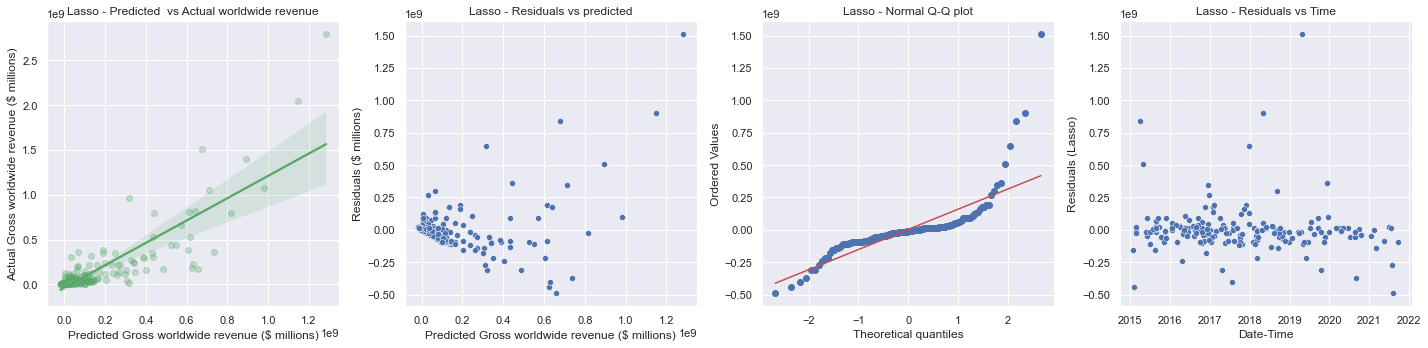

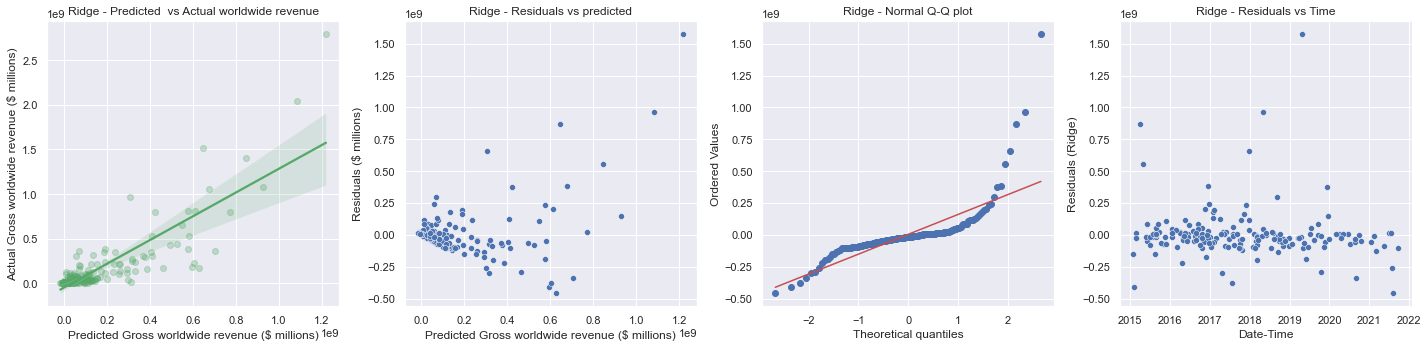

In [71]:
X_features = ['budget','runtime']
train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,X_test['DATE_TIME'],predicted_intervals = 'No',logs = 0,store_coefficients = 'No', target_transformation='None')

Lasso is performing better than ridge, but the best alpha for lasso has the same R^2 and adjusted R^2 than the baseline model.

Now, I will add the feature 'is_top_actor':

Lasso - Number of negative revenue predictions: 25
Ridge - Number of negative revenue predictions: 14
LASSO: Best R^2 is 0.678 for lambda 959.361, adjusted R^2: 0.673
LASSO: MAE all : 94.312, RMSE: 193.187
Ridge: Best R^2 is 0.663 for lambda 54.042, adjusted R^2: 0.657
Ridge: MAE all : 94.786, RMSE: 197.738


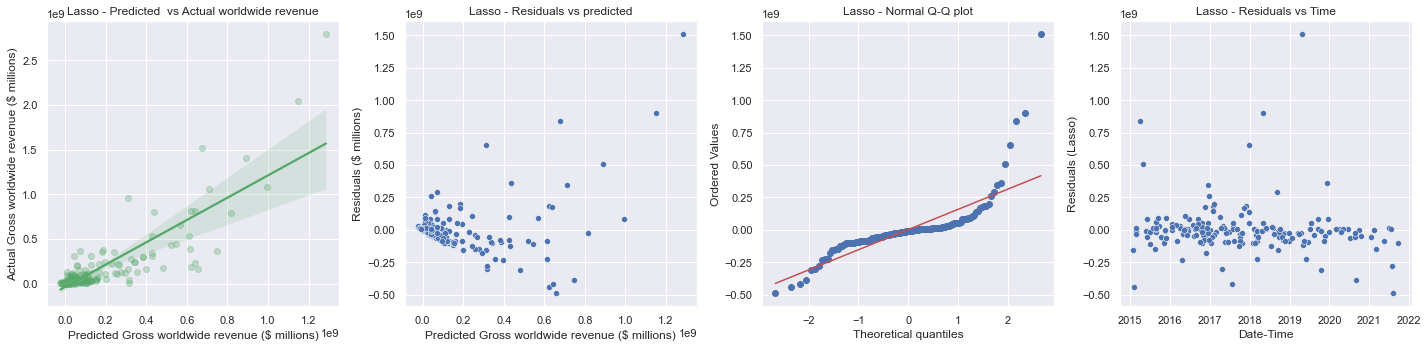

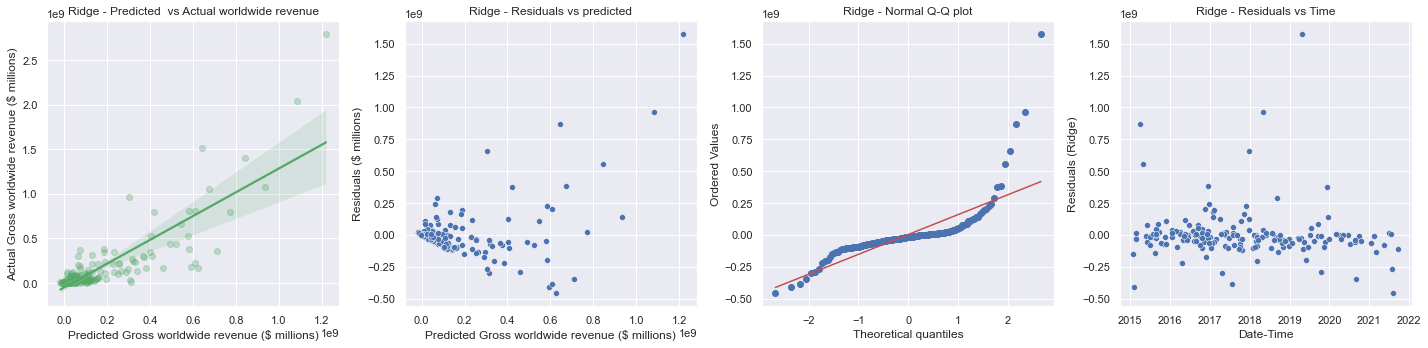

In [73]:
X_features = ['budget','runtime','is_top_actor']
train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,X_test['DATE_TIME'],predicted_intervals = 'No',logs = 0,store_coefficients = 'No', target_transformation='None')

The metrics did not improve.

#### Feature engineering: adding a polynomial term:

Based on the EDA pairplot, I believe that the relationship between the budget feature and the target feature, 'gross_worldwide' might be better explained with a polynomial term. Let's add a polynomial term:

In [88]:
# Add the new feature:
movies_list_filtered['budget_squared'] = movies_list_filtered['budget']**2
movies_list_filtered['log_budget'] = np.log(movies_list_filtered['budget'])

Make the split again! This is necessary, because while the DataFrame 'movies_list_filtered' has the new 'budget_squared' feature, X_train, X_test, y_train and y_test do not include it yet. Every time that a new feature is added, this step will be repeated:

In [75]:
X, y = movies_list_filtered.drop('gross_worldwide',axis=1), movies_list_filtered['gross_worldwide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

Lasso - Number of negative revenue predictions: 0
Ridge - Number of negative revenue predictions: 0
LASSO: Best R^2 is 0.810 for lambda 1000.000, adjusted R^2: 0.808
LASSO: MAE all : 88.694, RMSE: 148.550
Ridge: Best R^2 is 0.793 for lambda 62.057, adjusted R^2: 0.791
Ridge: MAE all : 92.128, RMSE: 154.896


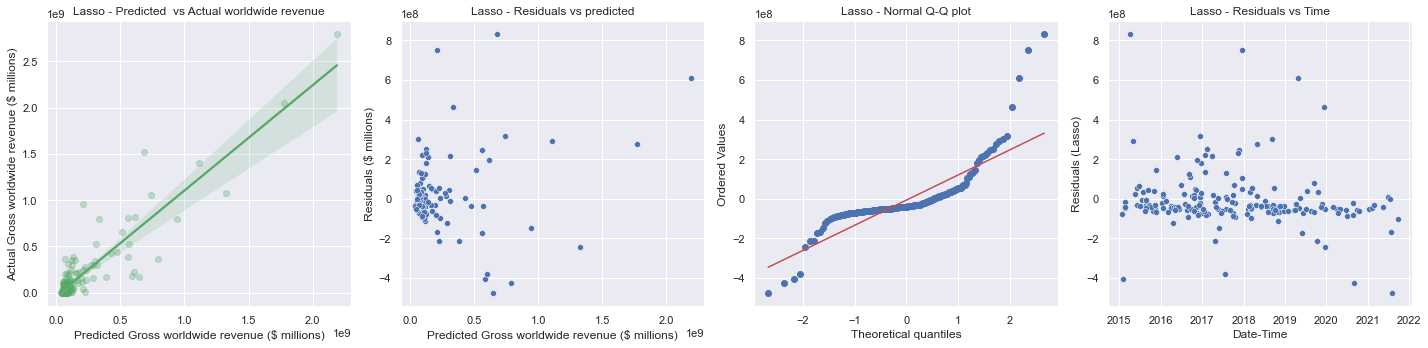

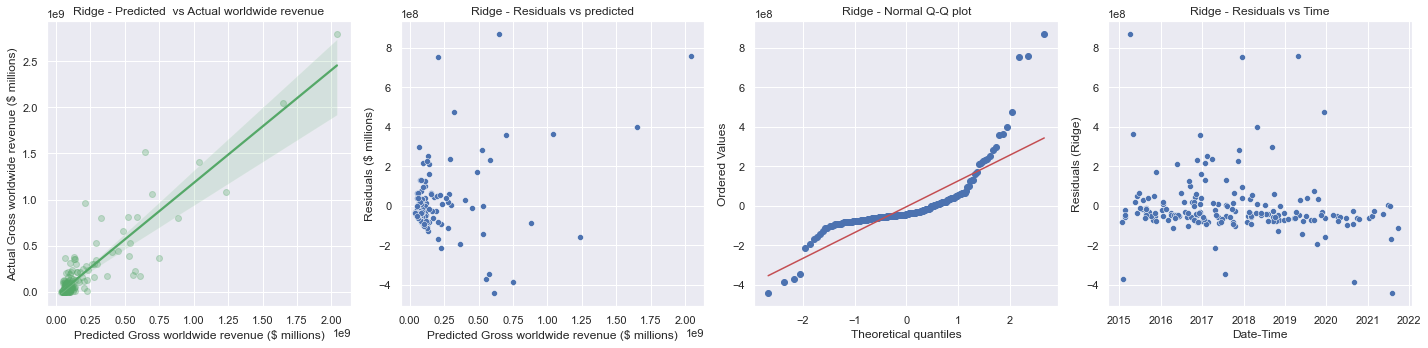

In [77]:
X_features = ['budget_squared','runtime']  
train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,X_test['DATE_TIME'],predicted_intervals = 'No',logs = 0,store_coefficients = 'No', target_transformation='None')

Simple mean cv r^2: 0.486 +- 0.141
test R^2: 0.810
test adjusted R^2: 0.808
test MAE all: 88.7
test RSME: 148.5


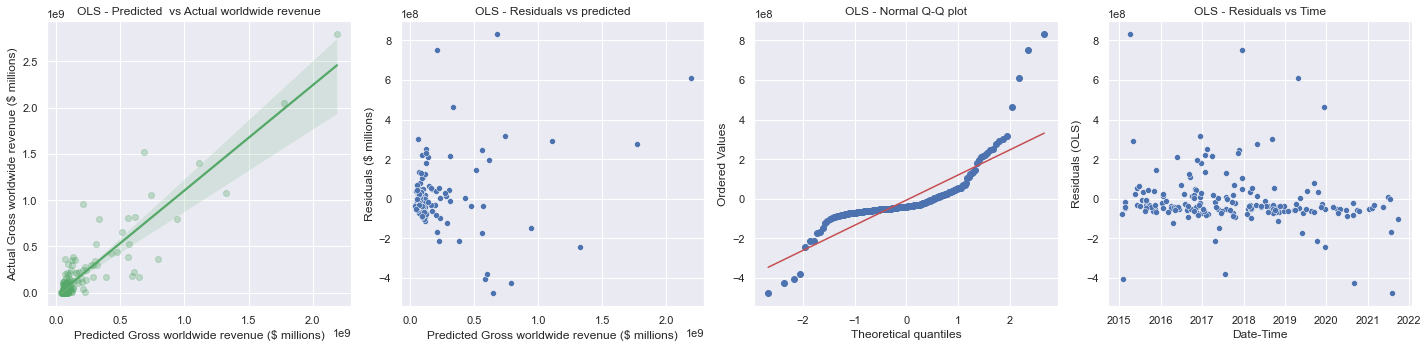

In [78]:
ols_cv(X_features,X_train,y_train,X_test,y_test,X_test['DATE_TIME'])  

This is a big improvement both in terms of R^2 (which is comparable to the baseline model given that it has the same number of features) and adjusted R^2, MAE and RMSE! For instance, the adjusted R^2 is now clearly larger: 0.675 < 0.808, and the MAE are both smaller. The best performing model is Lasso with a very large alpha (higher regularization). But the diagnostic plots do not show a good picture. The model residuals are clearly not normal and their variance is not constant. Also, the number of negative revenue predictions has been reduced to zero. 

Unfortunately, the linear regressions assumptions are not met. For instance, the variance of the residuals is not constant, and their distribution is not normal. All this despite an R^2 and adjusted R^2 greatly improved. I cannot trust that this model would generalize well. 

Let's add the 'is_top_actor' feature:

Lasso - Number of negative revenue predictions: 0
Ridge - Number of negative revenue predictions: 0
LASSO: Best R^2 is 0.812 for lambda 1000.000, adjusted R^2: 0.809
LASSO: MAE all : 87.341, RMSE: 147.516
Ridge: Best R^2 is 0.795 for lambda 64.686, adjusted R^2: 0.792
Ridge: MAE all : 90.823, RMSE: 154.151


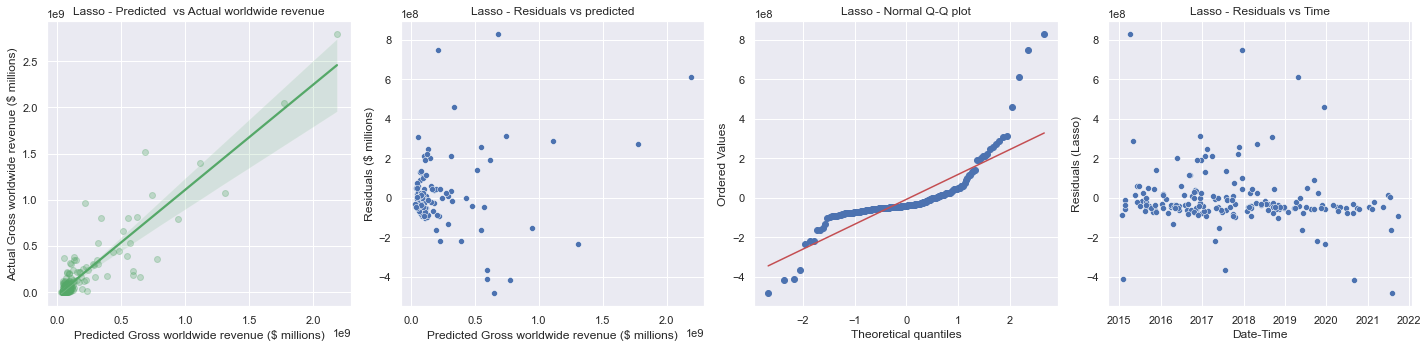

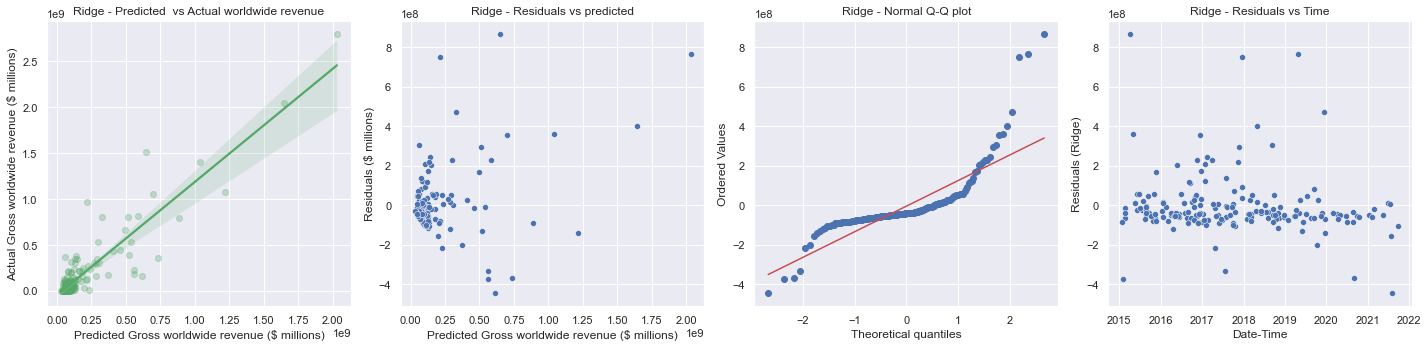

In [80]:
X_features = ['budget_squared','runtime','is_top_actor']

train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,X_test['DATE_TIME'],predicted_intervals = 'No',logs = 0,store_coefficients = 'No', target_transformation='None')

Let's add the 'action' feature:

In [146]:
X_features = ['budget_squared','runtime','is_top_actor','Action']
train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,predicted_intervals = 'No',store_coefficients = 'No',target_transformation='None')

LASSO: Best R^2 is 0.813 for lambda 986.266, adjusted R^2: 0.809
LASSO: MAE all : 87.194, RMSE: 147.189
Ridge: Best R^2 is 0.796 for lambda 61.205, adjusted R^2: 0.791
Ridge: MAE all : 90.706, RMSE: 153.910


Let's try with all the features:

In [148]:
X_features = ['budget_squared','runtime','is_top_actor','Action','Comedy','Crime','Drama','Genre_Other','Thriller','MPPA_updated_PG','MPPA_updated_PG-13','MPPA_updated_R','ColumbiaPictures','ParamountPictures','UniversalPictures','WaltDisneyPictures','WarnerBros','month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September']
train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,predicted_intervals = 'No',store_coefficients = 'No',target_transformation='None')

LASSO: Best R^2 is 0.791 for lambda 1000.000, adjusted R^2: 0.753
LASSO: MAE all : 90.377, RMSE: 155.764
Ridge: Best R^2 is 0.747 for lambda 120.526, adjusted R^2: 0.702
Ridge: MAE all : 95.547, RMSE: 171.092


Number of negative revenue predictions: 19


/var/folders/8d/3_q5vd9921q3fp1sc3qwm2wm0000gn/T/ipykernel_5039/1433072072.py:34: RuntimeWarning: invalid value encountered in log
  ax = sns.regplot(x=np.log(test_set_pred_lasso), y=np.log(y_test),color="g",scatter_kws={'alpha':0.3})


array([ 1.48364135e+08,  3.42205898e+07,  8.77241107e+06, -1.27850167e+06,
        7.72648543e+06, -1.13724429e+06, -2.21319379e+07,  4.91605830e+06,
        9.61594383e+06,  3.21149132e+07,  2.00101552e+07,  1.02751902e+07,
        1.17681302e+07,  5.02421008e+05,  3.61045718e+07,  3.17781917e+07,
        3.76037412e+06,  7.00478139e+05,  2.30176855e+06,  3.21832422e+06,
       -2.11210516e+06,  1.35832297e+07,  1.77590199e+07,  4.28731889e+06,
       -4.52780958e+06,  1.05252409e+06,  2.65804513e+06,  1.85117180e+06])

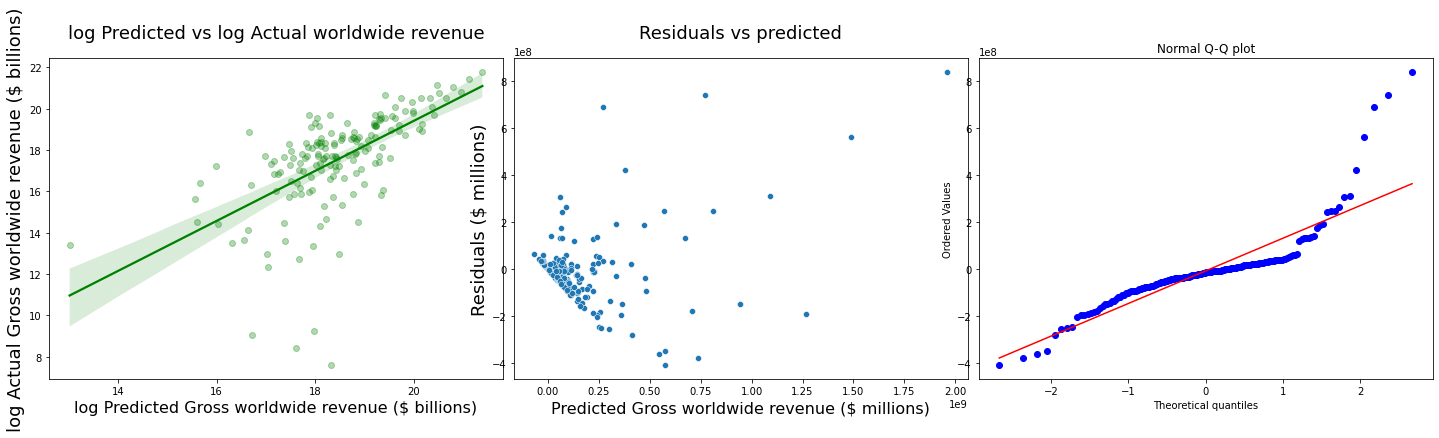

In [152]:
diagnostic_plot(X_features,X_train,X_test,y_train,y_test,logs = 1,target_transformation ='None')

Many negative predictions, and the linear regression assumptions are still not met. 

Now only with the months of July, January and February (July uses to have the hightest revenue values, and January and February, the lowest):

In [162]:
X_features = ['budget_squared','runtime','is_top_actor','Action','Comedy','Crime','Drama','Genre_Other','Thriller','MPPA_updated_PG','MPPA_updated_PG-13','MPPA_updated_R','ColumbiaPictures','ParamountPictures','UniversalPictures','WaltDisneyPictures','WarnerBros',
       'month_February', 'month_January', 'month_July']
lasso_best_coef, ridge_best_coef = train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,predicted_intervals = 'No',store_coefficients = 'Yes',target_transformation='None')

LASSO: Best R^2 is 0.797 for lambda 1000.000, adjusted R^2: 0.772
LASSO: MAE all : 88.297, RMSE: 153.423
Ridge: Best R^2 is 0.757 for lambda 109.405, adjusted R^2: 0.727
Ridge: MAE all : 93.955, RMSE: 167.896


So, the current model has a problem because the linear regression assumptions are broken. The best model improves, improves the adjusted R^2, and the MAE, when compared with the baseline model, although the MAE only improves for revenue predictions above $1 Billion. Also, it is worth noting that the released month is worsening the model (the adjusted R^2) despite cross-validating the choice of the lambda regularization parameters for both Lasso and Ridge regression. It is possible that the range of lambda should be even higher (the upper value for Lasso is 1000).

In [165]:
lasso_best_coef

array([ 1.49223035e+08,  3.39941940e+07,  8.87328178e+06,  3.94664444e+05,
        8.94308928e+06, -9.14080078e+05, -2.26106357e+07,  6.53411511e+06,
        9.64541515e+06,  3.01822434e+07,  1.78433061e+07,  9.50160635e+06,
        1.22267342e+07,  9.16947083e+05,  3.78535701e+07,  3.21485387e+07,
        3.86762348e+06,  5.33718968e+05, -5.21942804e+06,  1.03886401e+07])

The best most important feature is the budget.

### Just in case, let's try if the logarithm of the budget improves the results:

In [171]:
movies_list_filtered['log_budget'] = np.log(movies_list_filtered['budget'])

In [172]:
X, y = movies_list_filtered.drop('gross_worldwide',axis=1), movies_list_filtered['gross_worldwide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [174]:
X_features = ['log_budget','runtime','is_top_actor']
train_and_test_with_cv(X_features,X_train,X_test,y_train,y_test,predicted_intervals = 'Yes',store_coefficients = 'No',target_transformation='None')

LASSO: Best R^2 is 0.257 for lambda 986.266, adjusted R^2: 0.244
LASSO: MAE all : 163.531, RMSE: 293.554
Ridge: Best R^2 is 0.265 for lambda 75.314, adjusted R^2: 0.253
Ridge: MAE all : 158.853, RMSE: 291.821
LASSO MAE < $250M: 119.1
LASSO MAE $250M - $1B: 190.1
LASSO MAE > $1B : 1220.8
Ridge MAE < $250M: 111.9
Ridge MAE $250M - $1B: 196.3
Ridge MAE > $1B : 1220.8


The model worsens a lot! So, the log of the budget does not work indeed. 

# Log transformation of the target feature

I will now try to address the broken linear regression assumptions by transforming the target feature itself. I will try two methods: log-transformation and box-cox (or power-transformation). Let's start with the log-transformation!

As you can see below, the target feature is very skewed, not normally distributed. 

<AxesSubplot:>

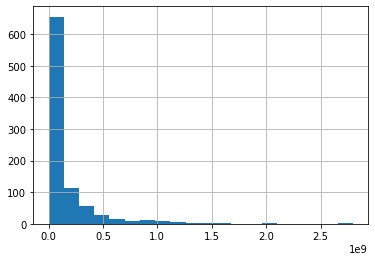

In [175]:
movies_list_filtered['gross_worldwide'].sort_values(ascending=False).hist(bins=20)

<AxesSubplot:>

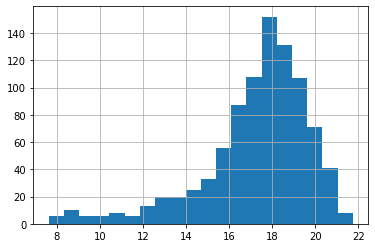

In [183]:
np.log(movies_list_filtered['gross_worldwide'].sort_values(ascending=False)).hist(bins=20)

In [184]:
movies_list_filtered['log_gross_worldwide'] = np.log(movies_list_filtered['gross_worldwide'])
# Make the split again! This is very important:
X_log, y_log = movies_list_filtered.drop('log_gross_worldwide',axis=1), movies_list_filtered['log_gross_worldwide']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=.2, random_state=10)


Lasso - Number of negative revenue predictions: 0
Ridge - Number of negative revenue predictions: 0
LASSO: Best R^2 is 0.609 for lambda 0.026, adjusted R^2: 0.600
LASSO: MAE all : 83.006, RMSE: 195.103
Ridge: Best R^2 is 0.610 for lambda 16.452, adjusted R^2: 0.602
Ridge: MAE all : 82.698, RMSE: 190.727
LASSO MAE < $250M: 37.5
LASSO MAE $250M - $1B: 197.3
LASSO MAE > $1B : 791.6
Ridge MAE < $250M: 37.4
Ridge MAE $250M - $1B: 201.1
Ridge MAE > $1B : 791.6


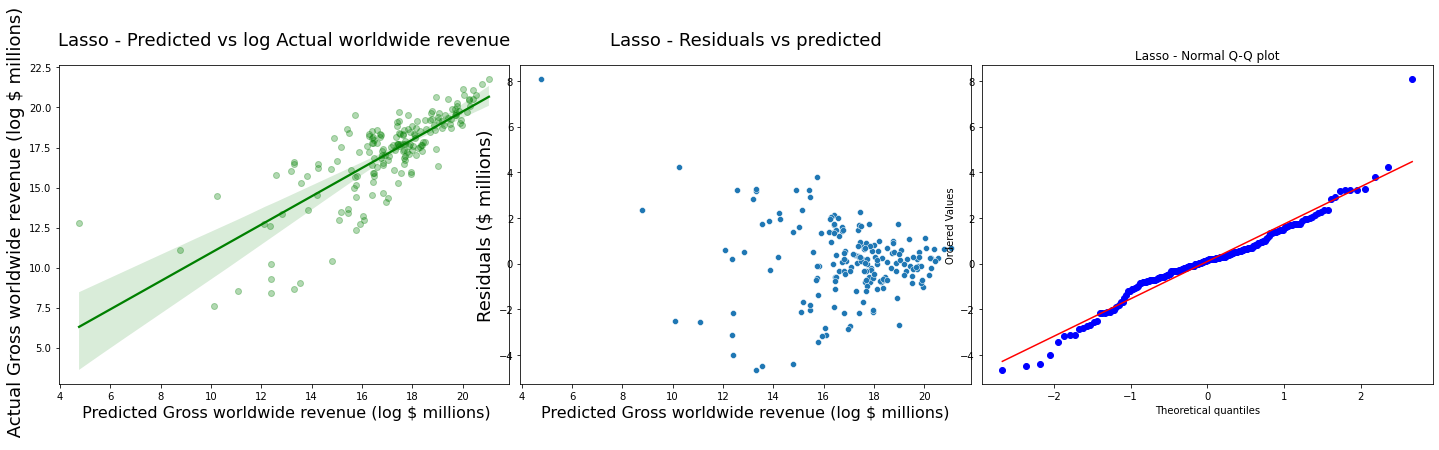

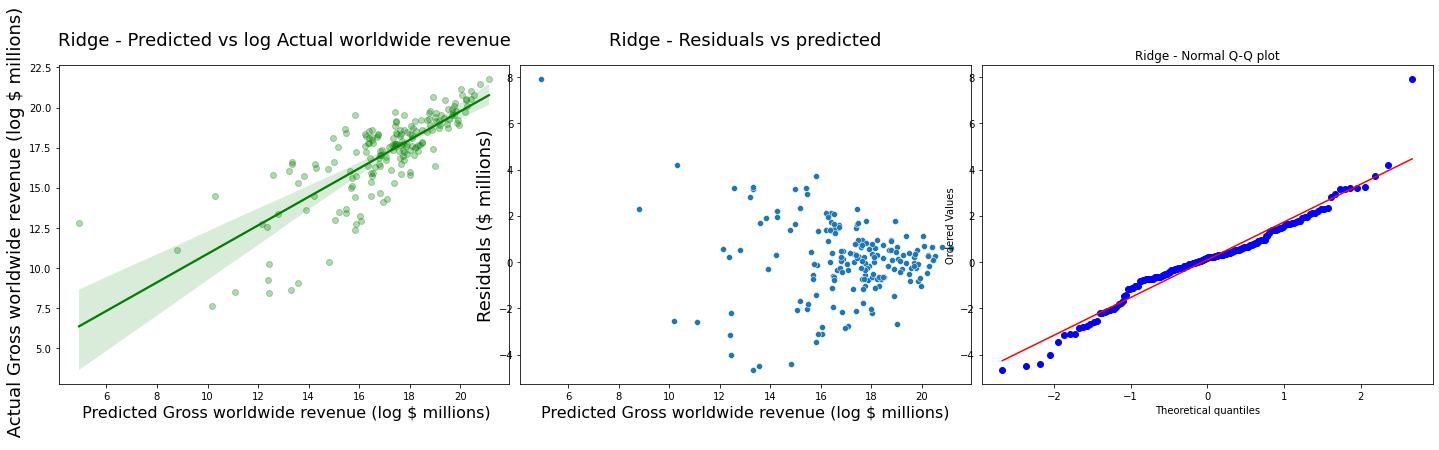

In [385]:
X_features = ['log_budget','runtime','is_top_actor','Action']

train_and_test_with_cv(X_features,X_train_log,X_test_log,y_train_log,y_test_log,logs = 0, predicted_intervals = 'Yes',store_coefficients = 'No',target_transformation = 'log')

There is a lot of improvement here! Let's add more features. 

Lasso - Number of negative revenue predictions: 0
Ridge - Number of negative revenue predictions: 0
LASSO: Best R^2 is 0.643 for lambda 0.004, adjusted R^2: 0.606
LASSO: MAE all : 77.292, RMSE: 171.024
Ridge: Best R^2 is 0.648 for lambda 6.513, adjusted R^2: 0.612
Ridge: MAE all : 77.511, RMSE: 171.269
LASSO MAE < $250M: 41.4
LASSO MAE $250M - $1B: 197.7
LASSO MAE > $1B : 536.4
Ridge MAE < $250M: 41.5
Ridge MAE $250M - $1B: 198.9
Ridge MAE > $1B : 536.4


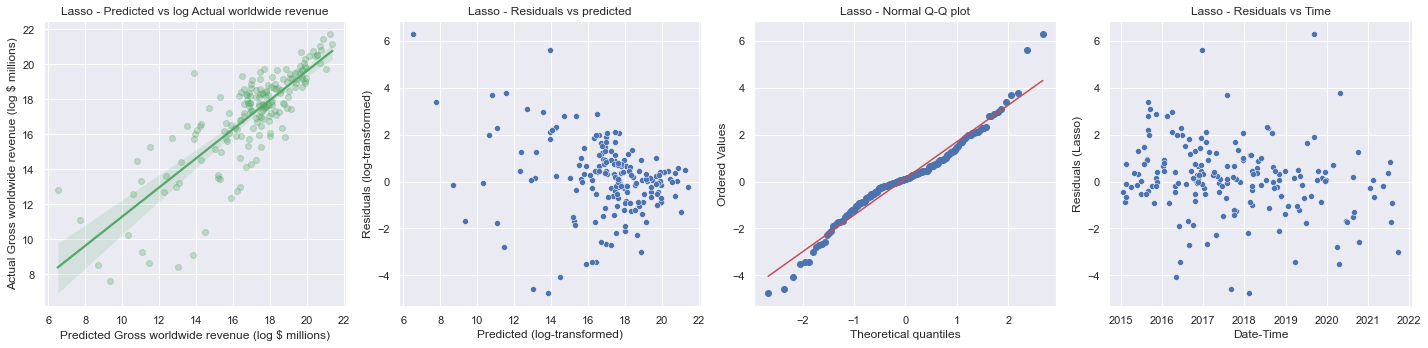

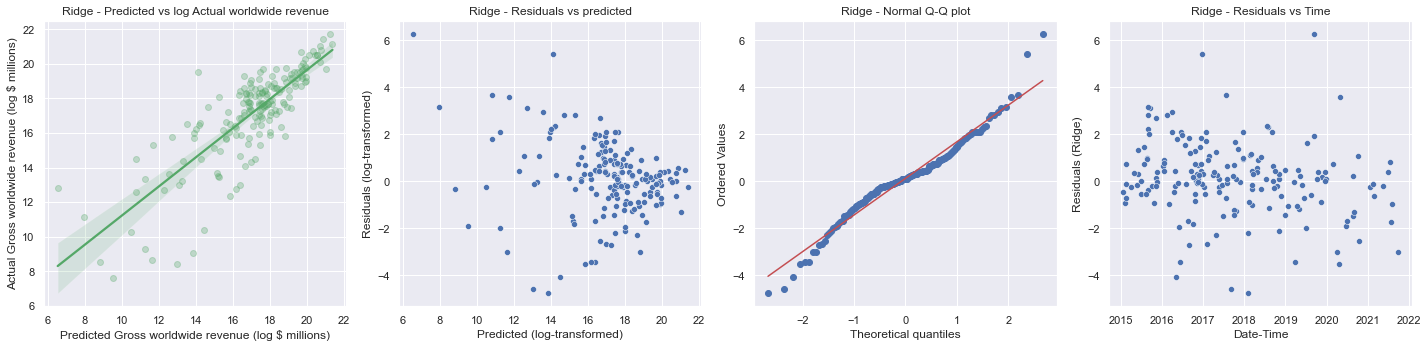

In [538]:
X_features = ['log_budget','runtime','is_top_actor','Action','Comedy','Crime','Drama','Genre_Other','Thriller','MPPA_updated_PG','MPPA_updated_PG-13','MPPA_updated_R','ColumbiaPictures','ParamountPictures','UniversalPictures','WaltDisneyPictures','WarnerBros']

train_and_test_with_cv(X_features,X_train_log,X_test_log,y_train_log,y_test_log,X_test_box_cox['DATE_TIME'],logs = 0, predicted_intervals = 'Yes',store_coefficients = 'No',target_transformation = 'log')




Lasso - Number of negative revenue predictions: 0
Ridge - Number of negative revenue predictions: 0
LASSO: Best R^2 is 0.643 for lambda 0.004, adjusted R^2: 0.606
LASSO: MAE all : 77.292, RMSE: 171.024
Ridge: Best R^2 is 0.648 for lambda 6.513, adjusted R^2: 0.612
Ridge: MAE all : 77.511, RMSE: 171.269
LASSO MAE < $250M: 41.4
LASSO MAE $250M - $1B: 197.7
LASSO MAE > $1B : 536.4
Ridge MAE < $250M: 41.5
Ridge MAE $250M - $1B: 198.9
Ridge MAE > $1B : 536.4


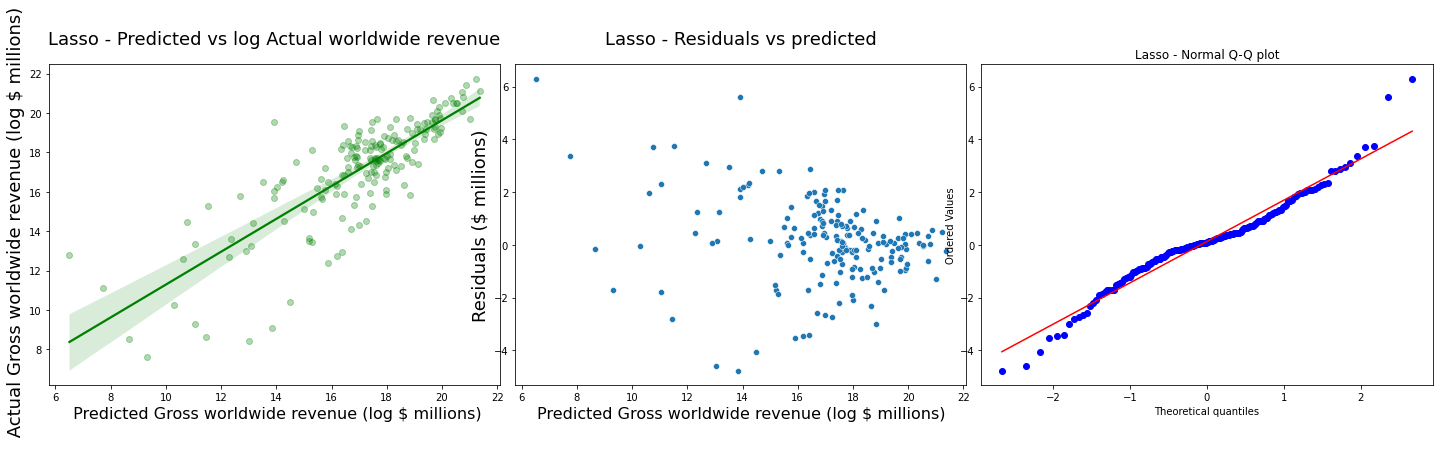

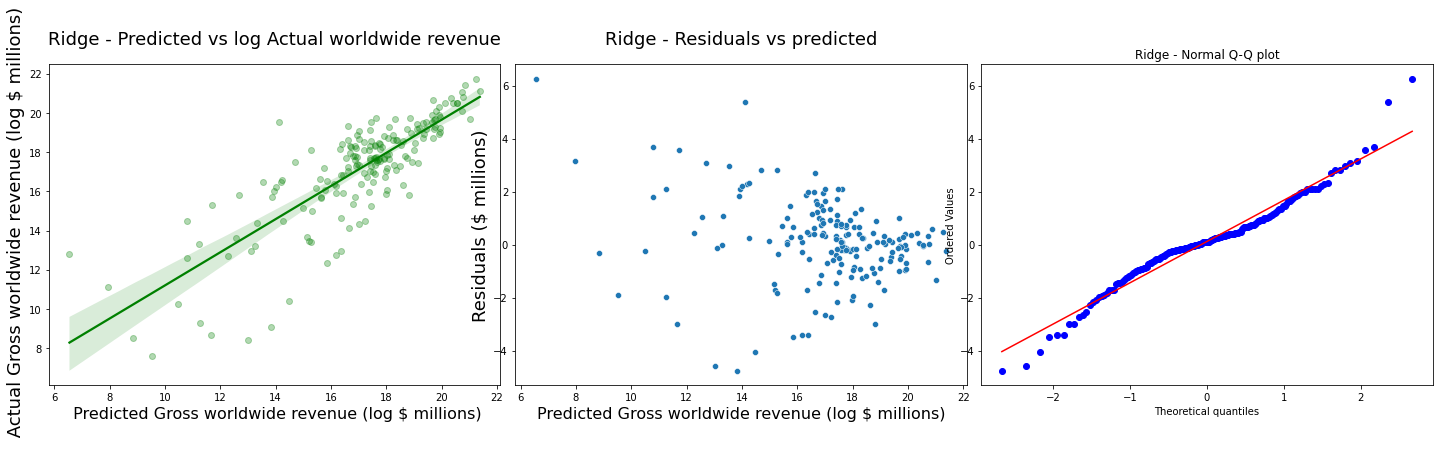

In [323]:
X_features = ['log_budget','runtime','is_top_actor','Action','Comedy','Crime','Drama','Genre_Other','Thriller','MPPA_updated_PG','MPPA_updated_PG-13','MPPA_updated_R','ColumbiaPictures','ParamountPictures','UniversalPictures','WaltDisneyPictures','WarnerBros']

train_and_test_with_cv(X_features,X_train_log,X_test_log,y_train_log,y_test_log,logs = 0, predicted_intervals = 'Yes',store_coefficients = 'No',target_transformation = 'log')

In [308]:
np.exp(21.1)-np.exp(19.1)

1260263347.635686

In [310]:
np.exp(6)

403.4287934927351

These models still have some problems with the linear regression assumptions. Let's try the box-cox transformation:

# Box-Cox transformation of the target feature (power transformation)

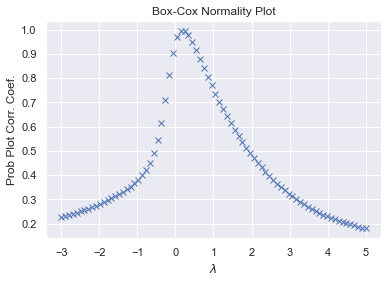

In [82]:
from scipy.special import boxcox, inv_boxcox

# plot to show optimal lambda values
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(movies_list_filtered.gross_worldwide, 
                             -3, 5, plot=ax)

In [83]:
#potential lambda values and resulting correlation values

#here we're pulling the lambda value that coreresponds to the 
#highest correlation value
zipped = list(zip(prob[0], prob[1]))

corr_value = 0
lamb_value = 0

for lamb_corr_pair in zipped:
    if lamb_corr_pair[1] > corr_value:
        corr_value = lamb_corr_pair[1]
        lamb_value = lamb_corr_pair[0]
        
lamb_value

0.13924050632911378

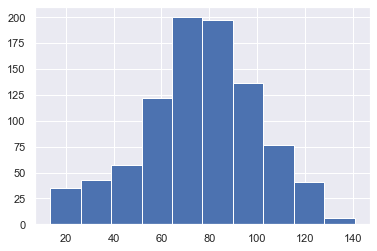

In [84]:
y_t=(np.power(movies_list_filtered.gross_worldwide,0.139)-1)/0.139

plt.hist(y_t);

In [85]:
movies_list_filtered['box_cox_gross_worldwide'] = (np.power(movies_list_filtered.gross_worldwide,0.139)-1)/0.139

In [89]:
# Make the split again! This is very important:
X_box_cox, y_box_cox = movies_list_filtered.drop('box_cox_gross_worldwide',axis=1), movies_list_filtered['box_cox_gross_worldwide']
X_train_box_cox, X_test_box_cox, y_train_box_cox, y_test_box_cox = train_test_split(X_box_cox, y_box_cox, test_size=.2, random_state=10)

Lasso - Number of negative revenue predictions: 0
Ridge - Number of negative revenue predictions: 0
LASSO: Best R^2 is 0.607 for lambda 0.035, adjusted R^2: 0.598
LASSO: MAE all : 98.117, RMSE: 252.815
Ridge: Best R^2 is 0.613 for lambda 14.130, adjusted R^2: 0.604
Ridge: MAE all : 98.933, RMSE: 254.172
LASSO MAE < $250M: 36.7
LASSO MAE $250M - $1B: 239.3
LASSO MAE > $1B : 1130.7
Ridge MAE < $250M: 36.5
Ridge MAE $250M - $1B: 245.4
Ridge MAE > $1B : 1130.7


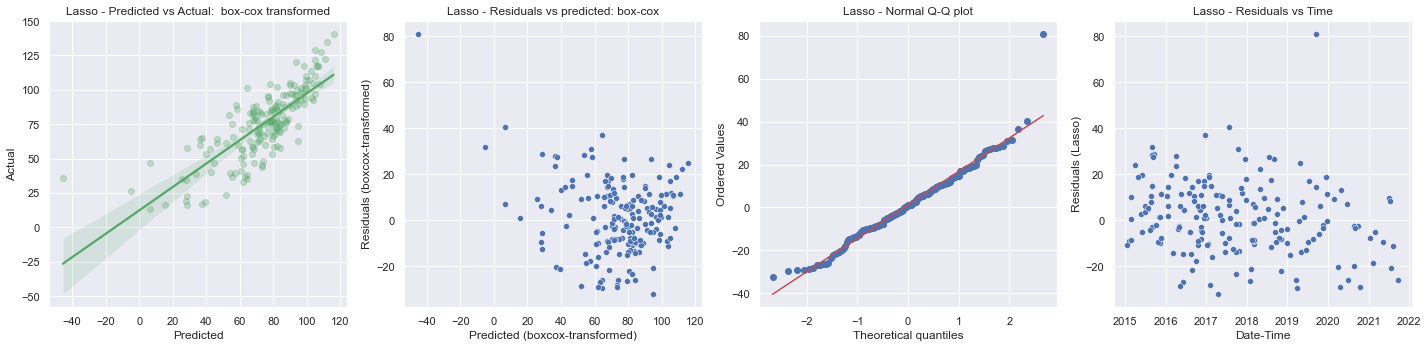

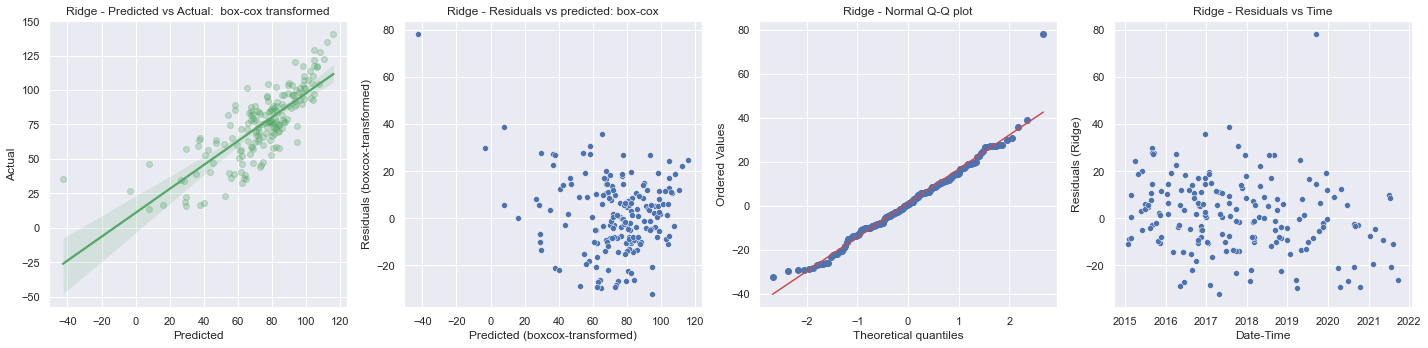

In [90]:

X_features = ['log_budget','runtime','is_top_actor','Action']

train_and_test_with_cv(X_features,X_train_box_cox,X_test_box_cox,y_train_box_cox,y_test_box_cox,X_test_box_cox['DATE_TIME'],logs = 0, predicted_intervals = 'Yes',store_coefficients = 'No',target_transformation = 'boxcox',lambda_boxcox = 0.139)


### This is the best model:

Lasso - Number of negative revenue predictions: 0
Ridge - Number of negative revenue predictions: 0
LASSO: Best R^2 is 0.664 for lambda 0.008, adjusted R^2: 0.630
LASSO: MAE all : 86.940, RMSE: 208.710
Ridge: Best R^2 is 0.667 for lambda 4.422, adjusted R^2: 0.633
Ridge: MAE all : 86.984, RMSE: 209.066
LASSO MAE < $250M: 39.9
LASSO MAE $250M - $1B: 213.7
LASSO MAE > $1B : 805.3
Ridge MAE < $250M: 39.8
Ridge MAE $250M - $1B: 213.8
Ridge MAE > $1B : 805.3


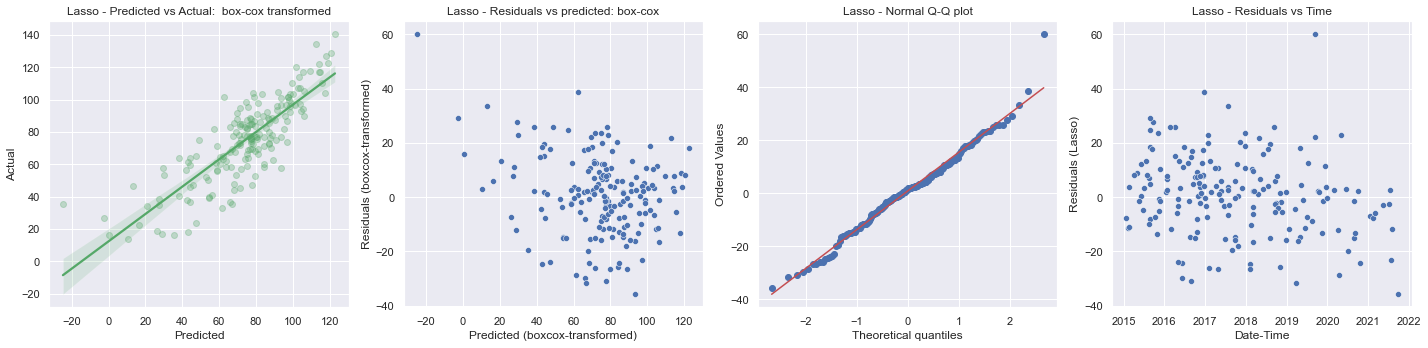

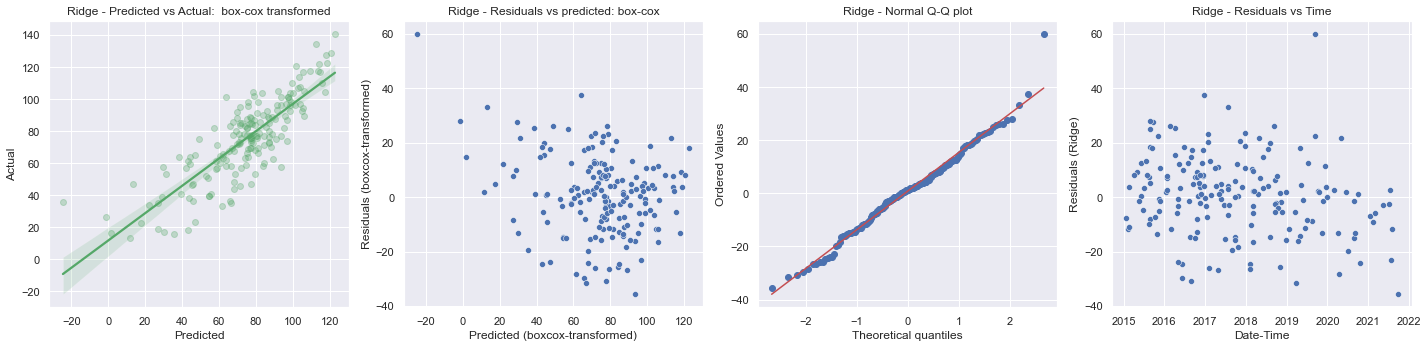

In [112]:
X_features = ['log_budget','runtime','is_top_actor','Action','Comedy','Crime','Drama','Genre_Other','Thriller','MPPA_updated_PG','MPPA_updated_PG-13','MPPA_updated_R','ColumbiaPictures','ParamountPictures','UniversalPictures','WaltDisneyPictures','WarnerBros']

coefficients_best_model = train_and_test_with_cv(X_features,X_train_box_cox,X_test_box_cox,y_train_box_cox,y_test_box_cox,X_test_box_cox['DATE_TIME'],logs = 0, predicted_intervals = 'Yes',store_coefficients = 'Yes',target_transformation = 'boxcox',lambda_boxcox = 0.139)

Transforming the target feature resulted in the best models. The models in which the target feature was box-cox transformed had residuals with the most constant variance, and more normally distributed - as shown in the Q-Q plots. The models in which the target was log-transformed had residuals that were a bit less normally distributed and had a bit more differences in variance. The adjusted R^2 is not recommended to compare models with different target features (as it is the case when transforming the target feature by applying log and box-cox transforms).
I have choosen the box-cox transformed models because their residuals are more normally distributed than the log-transformed models. Then, I used the adjusted R^2 to choose the best model. 


The **best model** is the linear regression model in which the target feature was box-cox transformed. The budget feature, the best predictor, is log-transformed. 

 Its predictor features are ['log_budget','runtime','is_top_actor','Action','Comedy','Crime','Drama','Genre_Other','Thriller','MPPA_updated_PG','MPPA_updated_PG-13','MPPA_updated_R','ColumbiaPictures','ParamountPictures','UniversalPictures','WaltDisneyPictures','WarnerBros']

This model had the best adjusted R^2 among the log-transformed models. In particular, the Ridge model worked slightly better than the Lasso model, both in terms of adjusted R^2 and R^2. 

When comparing it with the best model with the target feature log-transformed, the MAE and the RMSE are worse, though. My decision for choosing only between the box-transformed models is exclusively related to the fact that their residuals are the ones more normally distributed and with the most constant variance. That said, these diagnostic plots were computed without back-transforming both the predicted values to the original space, meaning that when calculating the MAE and RMSE in the original space, this might not perform as well. 

In [92]:
coefficients_best_model

(array([14.24447541,  3.66700155,  0.14654926, -1.17578841,  1.4978595 ,
        -0.26680444, -3.12865383,  0.63977346,  2.00153847,  7.46277146,
         8.9282827 ,  6.9299057 ,  1.31764368,  0.65110966,  2.6132646 ,
         1.93744391,  0.76917307]),
 array([14.19897711,  3.66971057,  0.19549389, -1.14604454,  1.51083349,
        -0.27274309, -3.11769785,  0.64908136,  1.97982571,  7.00865549,
         8.32958984,  6.32988126,  1.3321299 ,  0.66922785,  2.62598036,
         1.93817995,  0.79179989]))

In [95]:
pd.merge(,pd.Series(coefficients_best_model))

ValueError: Cannot merge a Series without a name

In [109]:
features_best_coefficient = pd.Series(X_features)
features_best_coefficient

0             log_budget
1                runtime
2           is_top_actor
3                 Action
4                 Comedy
5                  Crime
6                  Drama
7            Genre_Other
8               Thriller
9        MPPA_updated_PG
10    MPPA_updated_PG-13
11        MPPA_updated_R
12      ColumbiaPictures
13     ParamountPictures
14     UniversalPictures
15    WaltDisneyPictures
16            WarnerBros
dtype: object

In [122]:
features_best_coefficient = pd.Series(X_features, name='features')


In [123]:
coefficient_values =  pd.Series(coefficients_best_model[1], name='values') # Index 1 because this Ridge was the best model. 
coefficient_values

0     14.198977
1      3.669711
2      0.195494
3     -1.146045
4      1.510833
5     -0.272743
6     -3.117698
7      0.649081
8      1.979826
9      7.008655
10     8.329590
11     6.329881
12     1.332130
13     0.669228
14     2.625980
15     1.938180
16     0.791800
Name: values, dtype: float64

In [125]:
coefficients_best_model_df = pd.concat([features_best_coefficient,coefficient_values], axis=1)
coefficients_best_model_df

,features,values
0,log_budget,14.198977
1,runtime,3.669711
2,is_top_actor,0.195494
3,Action,-1.146045
4,Comedy,1.510833
5,Crime,-0.272743
6,Drama,-3.117698
7,Genre_Other,0.649081
8,Thriller,1.979826
9,MPPA_updated_PG,7.008655


In [130]:
coefficients_best_model_df.sort_values(by = 'values',ascending=False,inplace=True)
coefficients_best_model_df

,features,values
0,log_budget,14.198977
10,MPPA_updated_PG-13,8.329590
9,MPPA_updated_PG,7.008655
11,MPPA_updated_R,6.329881
1,runtime,3.669711
14,UniversalPictures,2.625980
8,Thriller,1.979826
15,WaltDisneyPictures,1.938180
4,Comedy,1.510833
12,ColumbiaPictures,1.332130
